In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import matplotlib.colors as mcolors
import numpy as np

In [2]:
data = pd.read_excel('example_file.xlsx')

In [3]:
class Timeline:
    def __init__(self, data: pd.DataFrame):
        df = data.sort_values('authors', ascending=False).reset_index(drop=True)
        self.authors = df['authors'].tolist()
        self.timepoints = df['time_points'].tolist()
        self.ylist = range(4, 4*len(self.authors)+4, 4)

        n = max(1, len(self.authors))
        cmap = plt.get_cmap('viridis')
        self.colors = [cmap(i/(n-1) if n > 1 else 0.5) for i in range(n)]


    def _tokens(self, s):
        if s is None or (isinstance(s, float) and np.isnan(s)) or (isinstance(s, pd.Series) and s.isna().all()):
            return []
        s = str(s).strip()
        if not s:
            return []
        return [t.strip() for t in s.split(',') if t.strip() and t.strip().lower() != 'nan']


    def _parse(self, token: str):
        if ':' in token:
            a, b = token.split(':', 1)
            try:
                a, b = float(a), float(b)
            except ValueError:
                return None
            if b < a:
                a, b = b, a
            return ("range", a, b)
        else:
            try:
                return ("point", float(token))
            except ValueError:
                return None

    def plot_line(self, author, timepoints, y, color):
        xlist = timepoints.split(',')
        x_min = float(xlist[0].split(':')[0])
        x_max = float(xlist[-1].split(':')[-1])
        plt.plot([x_min, x_max], [y]*2, '-', linewidth=1, solid_capstyle='round', color=color)
        for i, x in enumerate(xlist):
            if ':' in x:
                start, end = x.split(':')
                start = float(start)
                end = float(end)
                plt.plot([start, end], [y]*2, '-', linewidth=6, solid_capstyle='round', color=color, alpha=0.5)
        
        x_points = [float(x) for x in xlist if ':' not in x]
        plt.scatter(x_points, [y]*len(x_points), color=color)


    def set_yticks(self):
        plt.yticks(self.ylist, self.authors)

    
    def parse_citations(self, citations):
        parsed_citations = []
        for citation in citations:
            name_match = re.match(r'^([A-Za-z\s,.\-]+?)\s*,', citation)
            year_match = re.search(r'\((\d{4})\)', citation)
        
            name = name_match.group(1) if name_match else ''
            year = year_match.group(1) if year_match else ''
        
            result = f"{name.strip()} ({year})"
            parsed_citations.append(result)

        return parsed_citations

    
    def show(self):
        plt.figure(figsize=(15, 10))
        for author, timepoints, y, color in zip(self.authors, self.timepoints, self.ylist, self.colors):
            self.plot_line(author, timepoints, y, color)
        plt.yticks(self.ylist, self.authors)
        plt.axvline(x=0, color='black' , linestyle='-')
        plt.title('Measurement points of included studies')
        plt.xlabel('Time since traume (months)')
        
        plt.show()

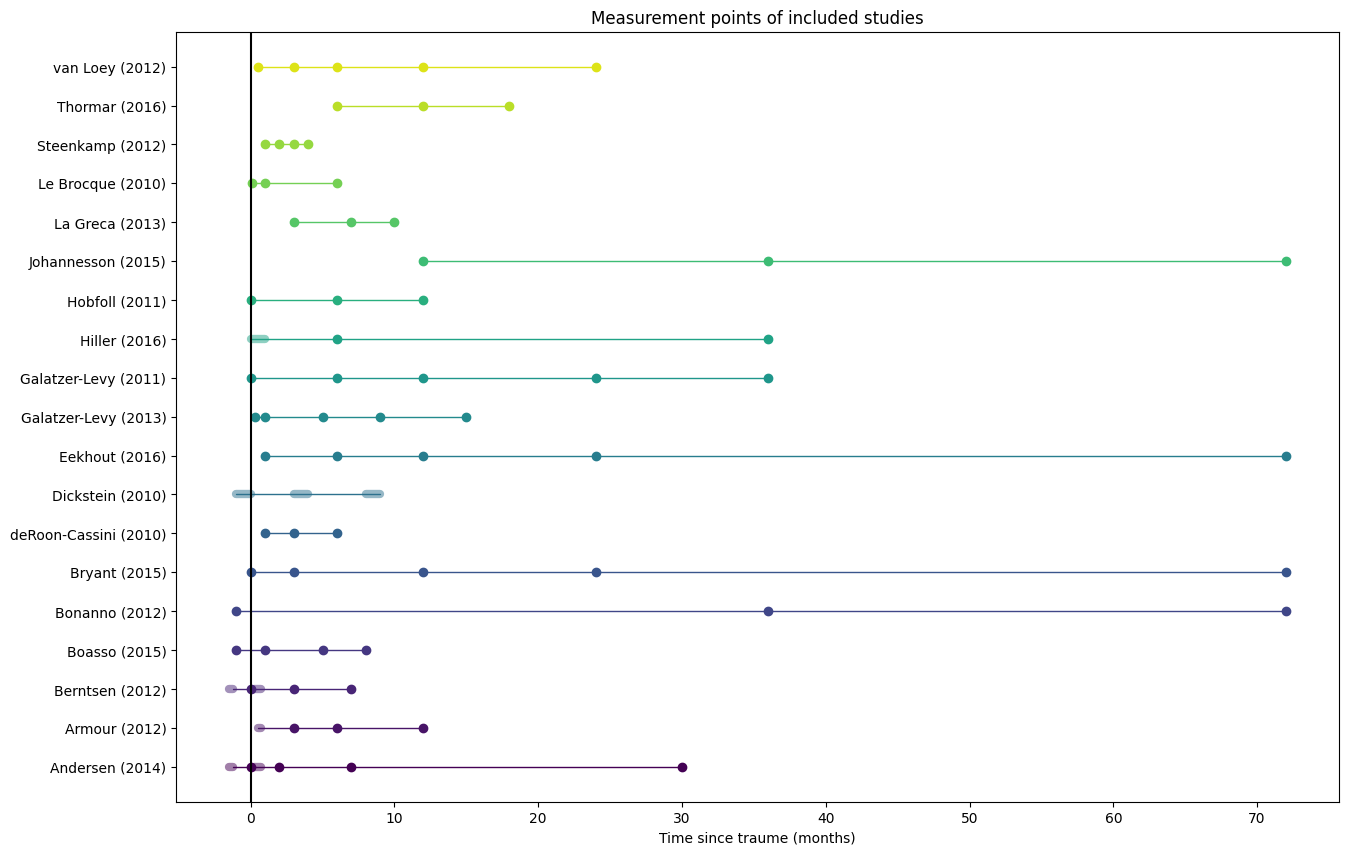

In [4]:
timeline = Timeline(data)
timeline.show()